<h1>Introduction</h1>

Diamond is one of the strongest and the most valuable substances produced naturally as a form of carbon with its atoms arranged in a crystal structure called diamond cubic. At room temperature and pressure, another solid form of carbon known as graphite is the chemically stable form of carbon, but diamond converts to it extremely slowly. However, unlike gold and silver, determining the price of a diamond is very complex because many features are to be considered for determining its price.
The value of diamonds depends upon their structure, cut, impurities, carats, and many other features. The uses of diamonds are many, such as in industries, as they are effective in cutting, polishing, and drilling. Since diamonds are extremely valuable, they have been traded across different countries for centuries now and this trade only increases with time.

The given Diamond dataset have 10 features and approx 54000 rows or instances. It has the features such as price, carat, cut, clarity, color, x(length), y(width), z(depth), depth percentage and table percentage in order to predict the price of the Diamond based on the given features.

<h1>Objective</h1>

The idea is to analyze the dataset and predict the diamond price.💎

In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\dhruv\\Downloads\\MLOps\\diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
# reindex the columns of dataset for making dataset more understandable
df = df.reindex(columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price'])
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


<h2>Data Exploration</h2>

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [5]:
df.tail()

,carat,cut,color,clarity,depth,table,x,y,z,price
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757
53939,0.75,Ideal,D,SI2,62.2,55.0,5.83,5.87,3.64,2757


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<h2>Data Cleaning</h2>

In [7]:
# checking null values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
# checking the duplicate values
df.duplicated().sum()

146

In [9]:
df= df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

<h4>Observation</h4><ul><li>Checking for duplicates we see some duplicate values and remove it from the dataset.</ul>

In [11]:
# checking descriptive statistics
df.describe()

,carat,depth,table,x,y,z,price
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,5.731214,5.734653,3.538714,3933.065082
std,0.47339,1.429909,2.233679,1.120695,1.141209,0.705037,3988.114460
min,0.20000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.40000,61.000000,56.000000,4.710000,4.720000,2.910000,951.000000
50%,0.70000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.04000,62.500000,59.000000,6.540000,6.540000,4.030000,5326.750000
max,5.01000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


<h4>Observation</h4><ul><li>Describe function display all the descriptive statistical values of the dataset features.</ul>

<h2>Univariate Analysis</h2>

<AxesSubplot:>

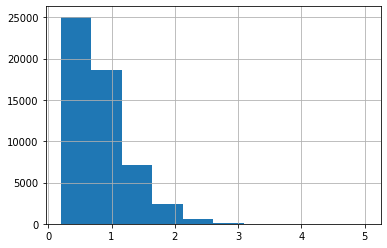

In [12]:
df['carat'].hist()

<AxesSubplot:>

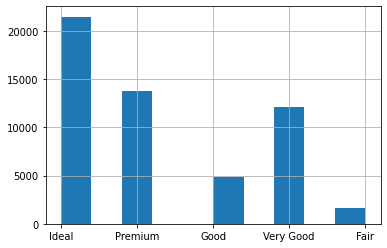

In [13]:
df['cut'].hist()

<AxesSubplot:>

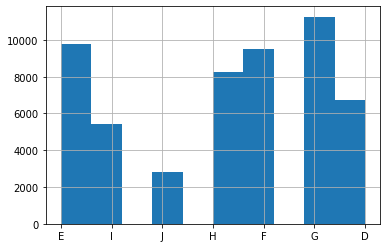

In [14]:
df['color'].hist()

<AxesSubplot:>

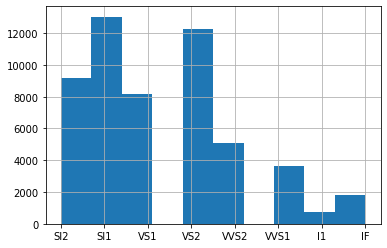

In [15]:
df['clarity'].hist()

<AxesSubplot:>

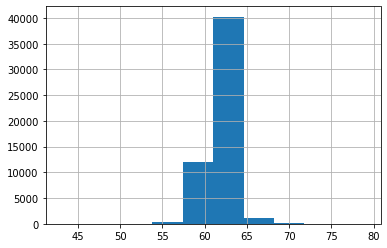

In [16]:
df['depth'].hist()

<AxesSubplot:>

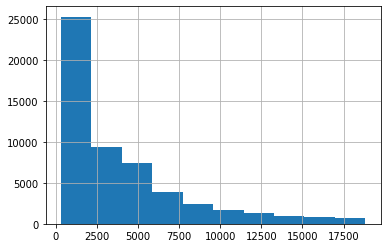

In [17]:
df['price'].hist()

<h2>Bivariate Analysis</h2>

<AxesSubplot:xlabel='carat', ylabel='price'>

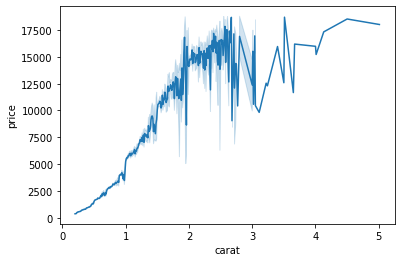

In [18]:
# plotting a line graph for gender against Income to see the correlation between these columns 
sns.lineplot(data=df, x='carat', y='price')

<AxesSubplot:xlabel='table', ylabel='price'>

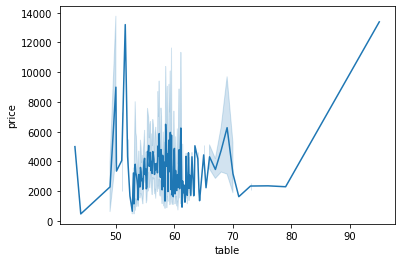

In [19]:
# plotting a line graph for occupation against Income to see the correlation between these columns 
sns.lineplot(data=df, x='table', y='price')

In [20]:
# all numeric (float and int) variables in the dataset
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,carat,depth,table,x,y,z,price
0,0.23,61.5,55.0,3.95,3.98,2.43,326
1,0.21,59.8,61.0,3.89,3.84,2.31,326
2,0.23,56.9,65.0,4.05,4.07,2.31,327
3,0.29,62.4,58.0,4.20,4.23,2.63,334
4,0.31,63.3,58.0,4.34,4.35,2.75,335


In [21]:
# correlation matrix
corr = df_numeric.corr()
corr

,carat,depth,table,x,y,z,price
carat,1.000000,0.027861,0.181091,0.975380,0.951908,0.953542,0.921548
depth,0.027861,1.000000,-0.297669,-0.025348,-0.029389,0.094757,-0.011048
table,0.181091,-0.297669,1.000000,0.194855,0.183231,0.150270,0.126566
x,0.975380,-0.025348,0.194855,1.000000,0.974592,0.970686,0.884504
y,0.951908,-0.029389,0.183231,0.974592,1.000000,0.951844,0.865395
z,0.953542,0.094757,0.150270,0.970686,0.951844,1.000000,0.861208
price,0.921548,-0.011048,0.126566,0.884504,0.865395,0.861208,1.000000


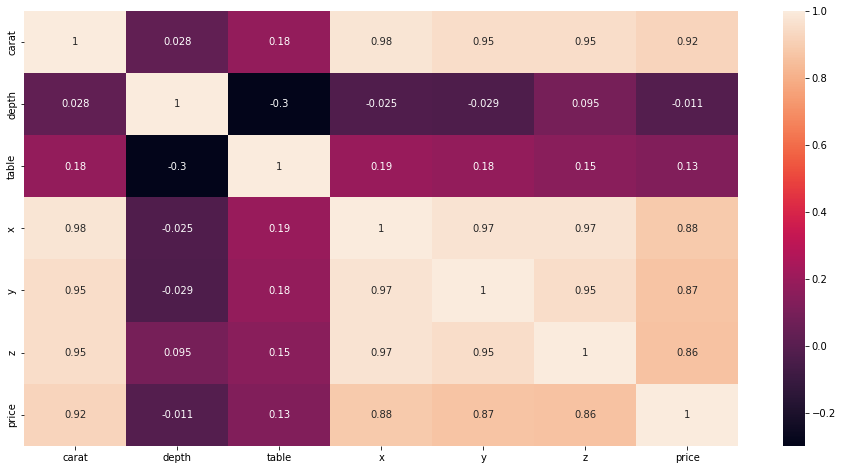

In [22]:
# plotting correlations on a heatmap
plt.figure(figsize=(16,8))
# heatmap
sns.heatmap(corr, annot=True)
plt.show()

<h4>Observation</h4><ul><li>From the above heatmap we can observe that there is high correlation between length, width, depth, carat and price.

<h2>Data Preparation</h2>

In [23]:
# Identifying the inputs(x) and output(y)

x = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = df['price']

In [24]:
# split into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.75, random_state= 0)

In [25]:
x_train

,carat,cut,color,clarity,depth,table,x,y,z
38685,0.30,Ideal,F,VVS1,61.1,55.0,4.36,4.38,2.67
6026,1.00,Very Good,D,SI2,63.2,56.0,6.38,6.33,4.02
26499,2.01,Very Good,H,SI2,63.4,57.0,8.00,7.93,5.05
28444,0.31,Ideal,G,VVS2,61.5,57.0,4.32,4.36,2.67
16616,1.21,Premium,H,SI1,60.2,58.0,6.93,6.88,4.16
...,...,...,...,...,...,...,...,...,...
46028,0.57,Premium,I,VVS1,62.1,58.0,5.32,5.25,3.28
52561,0.70,Ideal,G,VS2,62.1,57.0,5.66,5.70,3.53
42745,0.51,Good,E,SI1,63.5,54.0,5.07,5.10,3.23
43704,0.58,Ideal,D,SI2,61.2,57.0,5.38,5.41,3.30


In [26]:
y_train

38685     1041
6026      3965
26499    16111
28444      671
16616     6640
         ...  
46028     1728
52561     2536
42745     1343
43704     1436
2738      3247
Name: price, Length: 40345, dtype: int64

In [27]:
x_test

,carat,cut,color,clarity,depth,table,x,y,z
28297,0.24,Ideal,I,VVS1,62.3,57.0,3.98,3.95,2.47
17356,1.01,Ideal,G,VS2,62.6,56.0,6.41,6.44,4.02
48882,0.73,Premium,J,VS1,60.2,58.0,5.87,5.82,3.52
19901,1.05,Ideal,D,VS2,61.0,56.0,6.54,6.61,4.01
44377,0.52,Very Good,G,VS1,61.8,58.0,5.19,5.16,3.20
...,...,...,...,...,...,...,...,...,...
23346,0.30,Ideal,G,SI2,61.9,57.0,4.28,4.31,2.66
25751,1.52,Ideal,G,VS2,61.4,56.0,7.39,7.47,4.56
9447,1.02,Very Good,F,SI1,63.0,58.0,6.36,6.40,4.02
13489,1.16,Very Good,H,VS2,63.0,57.0,6.64,6.66,4.19


In [28]:
y_test

28297      432
17356     6964
48882     2037
19901     8451
44377     1581
         ...  
23346      422
25751    14692
9447      4594
13489     5537
42434     1314
Name: price, Length: 13449, dtype: int64

In [29]:
x_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [30]:
# separating train categorical column
x_train_cat = x_train.select_dtypes(include=['object'])
x_train_cat

,cut,color,clarity
38685,Ideal,F,VVS1
6026,Very Good,D,SI2
26499,Very Good,H,SI2
28444,Ideal,G,VVS2
16616,Premium,H,SI1
...,...,...,...
46028,Premium,I,VVS1
52561,Ideal,G,VS2
42745,Good,E,SI1
43704,Ideal,D,SI2


In [31]:
# separating train numerical column
x_train_num = x_train.select_dtypes(include=['int64', 'float64'])
x_train_num

,carat,depth,table,x,y,z
38685,0.30,61.1,55.0,4.36,4.38,2.67
6026,1.00,63.2,56.0,6.38,6.33,4.02
26499,2.01,63.4,57.0,8.00,7.93,5.05
28444,0.31,61.5,57.0,4.32,4.36,2.67
16616,1.21,60.2,58.0,6.93,6.88,4.16
...,...,...,...,...,...,...
46028,0.57,62.1,58.0,5.32,5.25,3.28
52561,0.70,62.1,57.0,5.66,5.70,3.53
42745,0.51,63.5,54.0,5.07,5.10,3.23
43704,0.58,61.2,57.0,5.38,5.41,3.30


<h2>Normalization</h2>

In [32]:
x_train_cat['cut'].value_counts(normalize=True)

Ideal        0.399058
Premium      0.256959
Very Good    0.223720
Good         0.090767
Fair         0.029496
Name: cut, dtype: float64

In [33]:
x_train_cat['color'].value_counts(normalize=True)

G    0.208750
E    0.182104
F    0.177122
H    0.153402
D    0.126410
I    0.100706
J    0.051506
Name: color, dtype: float64

In [34]:
x_train_cat['clarity'].value_counts(normalize=True)

SI1     0.242756
VS2     0.229248
SI2     0.168819
VS1     0.150675
VVS2    0.094659
VVS1    0.067171
IF      0.032891
I1      0.013781
Name: clarity, dtype: float64

In [35]:
x_train_cat_le = pd.DataFrame(index= x_train_cat.index)
x_train_cat_le.head()

""
38685
6026
26499
28444
16616


In [36]:
x_train_cat.cut.unique()

array(['Ideal', 'Very Good', 'Premium', 'Fair', 'Good'], dtype=object)

In [37]:
cut_encoder = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}

x_train_cat_le['cut'] = x_train_cat['cut'].apply(lambda k : cut_encoder[k])
x_train_cat_le

,cut
38685,4
6026,3
26499,3
28444,4
16616,5
...,...
46028,5
52561,4
42745,2
43704,4


In [38]:
x_train_cat.color.unique()

array(['F', 'D', 'H', 'G', 'I', 'E', 'J'], dtype=object)

In [39]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

x_train_cat_le['color'] = x_train_cat['color'].apply(lambda z : color_encoder[z])
x_train_cat_le

,cut,color
38685,4,5
6026,3,7
26499,3,3
28444,4,4
16616,5,3
...,...,...
46028,5,2
52561,4,4
42745,2,6
43704,4,7


In [40]:
x_train_cat.clarity.unique()

array(['VVS1', 'SI2', 'VVS2', 'SI1', 'I1', 'VS2', 'IF', 'VS1'],
      dtype=object)

In [41]:
clarity_encoder = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

x_train_cat_le['clarity'] = x_train_cat['clarity'].apply(lambda z : clarity_encoder[z])
x_train_cat_le.head()

,cut,color,clarity
38685,4,5,7
6026,3,7,2
26499,3,3,2
28444,4,4,6
16616,5,3,3


In [42]:
x_train_num.head()

,carat,depth,table,x,y,z
38685,0.30,61.1,55.0,4.36,4.38,2.67
6026,1.00,63.2,56.0,6.38,6.33,4.02
26499,2.01,63.4,57.0,8.00,7.93,5.05
28444,0.31,61.5,57.0,4.32,4.36,2.67
16616,1.21,60.2,58.0,6.93,6.88,4.16


In [43]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_num_rescaled = pd.DataFrame(scaler.fit_transform(x_train_num), 
                                    columns = x_train_num.columns, 
                                    index = x_train_num.index)

x_train_num_rescaled.head()

,carat,depth,table,x,y,z
38685,-1.051952,-0.455192,-1.107077,-1.224342,-1.177979,-1.250507
6026,0.429781,1.015185,-0.657431,0.581138,0.518920,0.695929
26499,2.567710,1.155221,-0.207785,2.029097,1.911248,2.180987
28444,-1.030784,-0.175120,-0.207785,-1.260094,-1.195383,-1.250507
16616,0.874301,-1.085354,0.241860,1.072729,0.997533,0.897781


In [44]:
x_train_transformed = pd.concat([x_train_num_rescaled, x_train_cat_le], axis=1)
x_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
38685,-1.051952,-0.455192,-1.107077,-1.224342,-1.177979,-1.250507,4,5,7
6026,0.429781,1.015185,-0.657431,0.581138,0.518920,0.695929,3,7,2
26499,2.567710,1.155221,-0.207785,2.029097,1.911248,2.180987,3,3,2
28444,-1.030784,-0.175120,-0.207785,-1.260094,-1.195383,-1.250507,4,4,6
16616,0.874301,-1.085354,0.241860,1.072729,0.997533,0.897781,5,3,3


In [45]:
x_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
28297,0.24,Ideal,I,VVS1,62.3,57.0,3.98,3.95,2.47
17356,1.01,Ideal,G,VS2,62.6,56.0,6.41,6.44,4.02
48882,0.73,Premium,J,VS1,60.2,58.0,5.87,5.82,3.52
19901,1.05,Ideal,D,VS2,61.0,56.0,6.54,6.61,4.01
44377,0.52,Very Good,G,VS1,61.8,58.0,5.19,5.16,3.20


In [46]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13449 entries, 28297 to 42434
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    13449 non-null  float64
 1   cut      13449 non-null  object 
 2   color    13449 non-null  object 
 3   clarity  13449 non-null  object 
 4   depth    13449 non-null  float64
 5   table    13449 non-null  float64
 6   x        13449 non-null  float64
 7   y        13449 non-null  float64
 8   z        13449 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.0+ MB


In [47]:
x_test_cat = x_test.select_dtypes(include=['object'])
x_test_cat

,cut,color,clarity
28297,Ideal,I,VVS1
17356,Ideal,G,VS2
48882,Premium,J,VS1
19901,Ideal,D,VS2
44377,Very Good,G,VS1
...,...,...,...
23346,Ideal,G,SI2
25751,Ideal,G,VS2
9447,Very Good,F,SI1
13489,Very Good,H,VS2


In [48]:
x_test_num = x_test.select_dtypes(include=['int64', 'float64'])
x_test_num.head()

,carat,depth,table,x,y,z
28297,0.24,62.3,57.0,3.98,3.95,2.47
17356,1.01,62.6,56.0,6.41,6.44,4.02
48882,0.73,60.2,58.0,5.87,5.82,3.52
19901,1.05,61.0,56.0,6.54,6.61,4.01
44377,0.52,61.8,58.0,5.19,5.16,3.20


In [49]:
x_test_num_rescaled = pd.DataFrame(scaler.transform(x_test_num), 
                                   columns = x_test_num.columns, 
                                   index = x_test_num.index)

x_test_num_rescaled.head()

,carat,depth,table,x,y,z
28297,-1.178958,0.385023,-0.207785,-1.563987,-1.552167,-1.538867
17356,0.450949,0.595077,-0.657431,0.607952,0.614643,0.695929
48882,-0.141745,-1.085354,0.241860,0.125299,0.075116,-0.024973
19901,0.535619,-0.525210,-0.657431,0.724146,0.762578,0.681511
44377,-0.586264,0.034934,0.241860,-0.482487,-0.499219,-0.486350


In [50]:
x_test_cat_le = pd.DataFrame(index = x_test_cat.index)
x_test_cat_le.head()

""
28297
17356
48882
19901
44377


In [51]:
x_test_cat_le['cut'] = x_test_cat['cut'].apply(lambda z : cut_encoder[z])
x_test_cat_le['color'] = x_test_cat['color'].apply(lambda z : color_encoder[z])
x_test_cat_le['clarity'] = x_test_cat['clarity'].apply(lambda z: clarity_encoder[z])

x_test_cat_le.head()

,cut,color,clarity
28297,4,2,7
17356,4,4,4
48882,5,1,5
19901,4,7,4
44377,3,4,5


In [52]:
x_test_transformed = pd.concat([x_test_num_rescaled, x_test_cat_le], axis=1)
x_test_transformed

,carat,depth,table,x,y,z,cut,color,clarity
28297,-1.178958,0.385023,-0.207785,-1.563987,-1.552167,-1.538867,4,2,7
17356,0.450949,0.595077,-0.657431,0.607952,0.614643,0.695929,4,4,4
48882,-0.141745,-1.085354,0.241860,0.125299,0.075116,-0.024973,5,1,5
19901,0.535619,-0.525210,-0.657431,0.724146,0.762578,0.681511,4,7,4
44377,-0.586264,0.034934,0.241860,-0.482487,-0.499219,-0.486350,3,4,5
...,...,...,...,...,...,...,...,...,...
23346,-1.051952,0.104951,-0.207785,-1.295847,-1.238894,-1.264925,4,4,2
25751,1.530497,-0.245138,-0.657431,1.483878,1.510954,1.474503,4,4,4
9447,0.472116,0.875149,0.241860,0.563262,0.579835,0.695929,3,5,3
13489,0.768463,0.875149,-0.207785,0.813526,0.806088,0.941035,3,3,4


In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_new = pd.DataFrame(scaler.fit_transform(x_train_transformed),columns = x_train_transformed.columns,index = x_train_transformed.index)
x_train_new.head()

,carat,depth,table,x,y,z,cut,color,clarity
38685,-1.051952,-0.455192,-1.107077,-1.224342,-1.177979,-1.250507,0.230731,0.346103,1.794657
6026,0.429781,1.015185,-0.657431,0.581138,0.518920,0.695929,-0.743712,1.521781,-1.248509
26499,2.567710,1.155221,-0.207785,2.029097,1.911248,2.180987,-0.743712,-0.829575,-1.248509
28444,-1.030784,-0.175120,-0.207785,-1.260094,-1.195383,-1.250507,0.230731,-0.241736,1.186024
16616,0.874301,-1.085354,0.241860,1.072729,0.997533,0.897781,1.205175,-0.829575,-0.639876


In [54]:
x_test_new = pd.DataFrame(scaler.fit_transform(x_test_transformed),columns = x_test_transformed.columns,index = x_test_transformed.index)
x_test_new.head()

,carat,depth,table,x,y,z,cut,color,clarity
28297,-1.176305,0.388869,-0.197182,-1.558624,-1.600353,-1.453165,0.242145,-1.405551,1.776780
17356,0.440447,0.597937,-0.639186,0.598959,0.628860,0.646213,0.242145,-0.229683,-0.032374
48882,-0.147463,-1.074606,0.244823,0.119496,0.073795,-0.031005,1.216009,-1.993485,0.570677
19901,0.524434,-0.517091,-0.639186,0.714386,0.781055,0.632669,0.242145,1.534119,-0.032374
44377,-0.588395,0.040423,0.244823,-0.484272,-0.517081,-0.464425,-0.731720,-0.229683,0.570677


In [55]:
print("X_train:",x_train_new.shape,"X_test:" ,x_test_new.shape,"y_train:",y_train.shape,"y_test:",y_test.shape)

X_train: (40345, 9) X_test: (13449, 9) y_train: (40345,) y_test: (13449,)


<h2>MLFlow Integration</h2>

In [56]:
import mlflow

In [57]:
mlflow.set_tracking_uri("sqlite:///test_mlflow.db")

In [58]:
mlflow.set_experiment("Diamond Price Prediction")

<Experiment: artifact_location='./mlruns/1', creation_time=1664619637268, experiment_id='1', last_update_time=1664619637268, lifecycle_stage='active', name='Diamond Price Prediction', tags={}>

In [59]:
from pickle import dump

dump(scaler, open('models/standard_scaler.pkl', 'wb'))

<h2>Experiment Runs</h2>

In [60]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

<h4>Experiment Run 1- Linear Regression</h4>

In [61]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Dhruv")
    mlflow.set_tag("algo", "Linear Regression")
    mlflow.log_param("data-path", "diamonds.csv")
    linear_regressor = LinearRegression()
    linear_regressor.fit(x_train_new, y_train)
    y_test_pred = linear_regressor.predict(x_test_new)
    acc = metrics.r2_score(y_test, y_test_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("RMSE", rmse)
    mlflow.sklearn.log_model(linear_regressor, artifact_path = "models")
    mlflow.log_artifact("models/standard_scaler.pkl")

C:\Users\dhruv\AppData\Local\Programs\Python\Python310\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


<h4>Experiment Run 2- KNN</h4>

In [65]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Dhruv")
    mlflow.set_tag("algo", "KNN")
    mlflow.log_param("data-path", "diamonds.csv")
    k = 9
    mlflow.log_param("n_neighbors", k)
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(x_train_new, y_train)
    y_test_pred = knn_regressor.predict(x_test_new)
    r2score_acc_knn = metrics.r2_score(y_test, y_test_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    mlflow.log_metric("accuracy", r2score_acc_knn)
    mlflow.log_metric("RMSE", rmse)
    mlflow.sklearn.log_model(knn_regressor, artifact_path="models")
    mlflow.log_artifact("models/standard_scaler.pkl")

<h4>Experiment Run 3- Random Forest Regression</h4>

In [67]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Dhruv")
    mlflow.set_tag("algo", "Random Forest Regression")
    mlflow.log_param("data-path", "diamonds.csv")
    t = 20
    rf_regressor = RandomForestRegressor(n_estimators = t)
    rf_regressor.fit(x_train_new, y_train)
    y_test_pred = rf_regressor.predict(x_test_new)
    acc = metrics.r2_score(y_test, y_test_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    mlflow.log_param("n_estimators", t)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("RMSE", rmse)
    mlflow.sklearn.log_model(rf_regressor, artifact_path = "models")
    mlflow.log_artifact("models/standard_scaler.pkl")

<h4>Experiment Run 4- Decision Tree Regression</h4>

In [69]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Dhruv")
    mlflow.set_tag("algo", "Decision Tree Regression")
    mlflow.log_param("data-path", "diamonds.csv")
    d = None
    dt_regressor = DecisionTreeRegressor(max_depth = d)
    dt_regressor.fit(x_train_new, y_train)
    y_test_pred = dt_regressor.predict(x_test_new)
    acc = metrics.r2_score(y_test, y_test_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    mlflow.log_param("max_depth", d)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("RMSE", rmse)
    mlflow.sklearn.log_model(dt_regressor, artifact_path = "models")
    mlflow.log_artifact("models/standard_scaler.pkl")

<h4>Experiment Run 5 - KNN with Hyperparameter Tuning</h4>

In [70]:
from sklearn.model_selection import GridSearchCV
mlflow.sklearn.autolog(max_tuning_runs = None)

In [ ]:
with mlflow.start_run():
    tuned_parameters = [{'n_neighbors': [i for i in range(1, 51)], 'p': [1, 2]}]
    gs = GridSearchCV(
        estimator = KNeighborsRegressor(),
        param_grid = tuned_parameters,
        scoring = 'neg_mean_squared_error',
        cv = 5,
        return_train_score = True,
        verbose = 1
    )
    gs.fit(x_train_new, y_train)
    mlflow.sklearn.autolog(disable = True)